# $k$均值算法

### 杜小勤，武汉纺织大学数学与计算机学院，2020年11月04日
https://duxiaoqin.github.io/

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target

data = np.array(iris_df.iloc[:, [2, 3]]) #取出第2列、第3列
print(data.shape)

(150, 2)


In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


绘制训练数据集

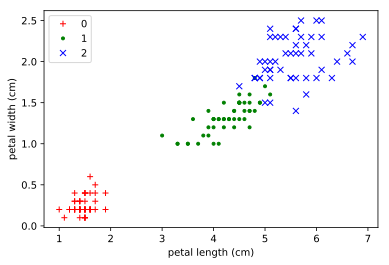

In [4]:
plt.plot(data[:50, 0], data[:50, 1], '+', color = 'red', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', color = 'green', label='1')
plt.plot(data[100:150, 0], data[100:150, 1], 'x', color = 'blue', label='2')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.savefig('KMeans_OUTPUT1.pdf', bbox_inches='tight')

In [5]:
class MyKmeans:
    def __init__(self, k, max_step = 100):
        self.k = k
        self.max_step = max_step
        
    def fit(self, data):
        np.random.seed()
        idx = np.random.randint(low = 0, high = len(data), size = self.k)
        centers = data[idx]
        
        centers_old = centers.copy()
        for step in range(self.max_step):
            clusters = {key: [] for key in range(self.k)}

            for point in data:
                nearest_index = np.argmin(np.sum((centers - point) ** 2, axis = 1))
                clusters[nearest_index].append(point)

            early_stop = True
            for k in range(self.k):
                centers[k] = sum(clusters[k]) / len(clusters[k])
                if (centers[k] != centers_old[k]).any():
                    early_stop = False
            if early_stop:
                break
            centers_old = centers.copy()
            print('Training step', step)
            
        print('Training finished!')
        return clusters, centers

In [6]:
my_km = MyKmeans(3)
clusters, centers = my_km.fit(data)

Training step 0
Training step 1
Training step 2
Training step 3
Training step 4
Training step 5
Training finished!


In [7]:
centers

array([[ 1.464     ,  0.244     ],
       [ 5.59583333,  2.0375    ],
       [ 4.26923077,  1.34230769]])

绘制聚类中心

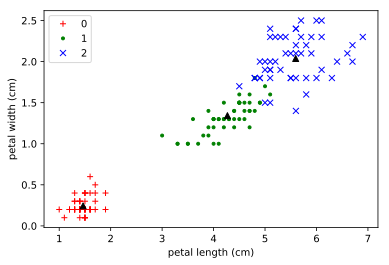

In [8]:
plt.plot(data[:50, 0], data[:50, 1], '+', color = 'red', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', color = 'green', label='1')
plt.plot(data[100:150, 0], data[100:150, 1], 'x', color = 'blue', label='2')
plt.plot(centers[0, 0], centers[0, 1], '^', color = 'black')
plt.plot(centers[1, 0], centers[1, 1], '^', color = 'black')
plt.plot(centers[2, 0], centers[2, 1], '^', color = 'black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.savefig('KMeans_OUTPUT2.pdf', bbox_inches='tight')

绘制聚类结果

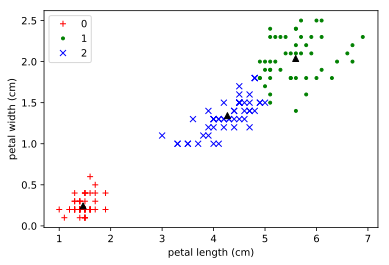

In [9]:
plt.plot(np.asarray(clusters[0])[:, 0], np.asarray(clusters[0])[:, 1], '+', color = 'red', label='0')
plt.plot(np.asarray(clusters[1])[:, 0], np.asarray(clusters[1])[:, 1], '.', color = 'green', label='1')
plt.plot(np.asarray(clusters[2])[:, 0], np.asarray(clusters[2])[:, 1], 'x', color = 'blue', label='2')
plt.plot(centers[0, 0], centers[0, 1], '^', color = 'black')
plt.plot(centers[1, 0], centers[1, 1], '^', color = 'black')
plt.plot(centers[2, 0], centers[2, 1], '^', color = 'black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.savefig('KMeans_OUTPUT3.pdf', bbox_inches='tight')

使用sklearn.KMeans

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters = 3, max_iter = 100).fit(data)
gt_labels__ = km.labels_
centers__ = km.cluster_centers_

绘制聚类中心

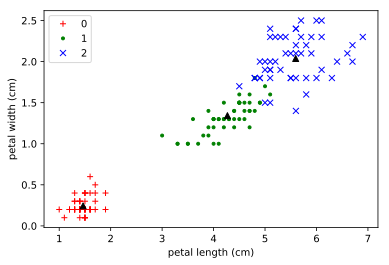

In [12]:
plt.plot(data[:50, 0], data[:50, 1], '+', color = 'red', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', color = 'green', label='1')
plt.plot(data[100:150, 0], data[100:150, 1], 'x', color = 'blue', label='2')
plt.plot(centers__[0, 0], centers__[0, 1], '^', color = 'black')
plt.plot(centers__[1, 0], centers__[1, 1], '^', color = 'black')
plt.plot(centers__[2, 0], centers__[2, 1], '^', color = 'black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.savefig('KMeans_OUTPUT4.pdf', bbox_inches='tight')

绘制聚类结果

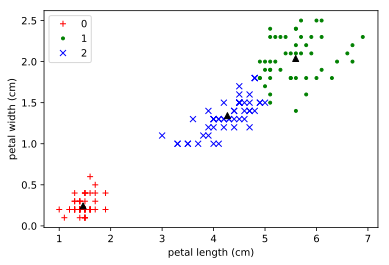

In [13]:
plt.plot(data[gt_labels__ == 0][:, 0], data[gt_labels__ == 0][:, 1], '+', color = 'red', label='0')
plt.plot(data[gt_labels__ == 1][:, 0], data[gt_labels__ == 1][:, 1], '.', color = 'green', label='1')
plt.plot(data[gt_labels__ == 2][:, 0], data[gt_labels__ == 2][:, 1], 'x', color = 'blue', label='2')
plt.plot(centers__[0, 0], centers__[0, 1], '^', color = 'black')
plt.plot(centers__[1, 0], centers__[1, 1], '^', color = 'black')
plt.plot(centers__[2, 0], centers__[2, 1], '^', color = 'black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.savefig('KMeans_OUTPUT5.pdf', bbox_inches='tight')

参考文献：
- https://github.com/hktxt/Learn-Statistical-Learning-Method;